### DA Question 1: Rider Behavior Analysis

Import all necessary packages.

In [59]:
# Apache parquet files (to save space)
import pyarrow as pa
import pyarrow.parquet as pq

# Dataframes and numerical
import pandas as pd
import numpy as np

# Increase pandas default display 
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

# Suppress scientific notation of data in pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# Graphing
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

Load **.parquet** file of all CitiBike rides from May 2021 through April 2022 into **pandas** dataframe.

In [2]:
CB_Data = pq.read_table('data/202105-202204-citibike-tripdata.parquet').to_pandas()

Understand the structure of the dataframe.

In [3]:
CB_Data.head()

,member_casual,rideable_type,started_at,start_station_name,start_lat,start_lng,start_boro,start_hood,ended_at,end_station_name,end_lat,end_lng,end_boro,end_hood,year,month,week_of_year,day_of_week,hour_of_day,duration_min,distance_mi,speed_mph
1,Member,Classic Bike,2021-05-13 12:48:08,Broadway & W 25 St,40.74,-73.99,Manhattan,Flatiron District,2021-05-13 13:07:37,E 2 St & Avenue B,40.72,-73.98,Manhattan,East Village,2021,5,19,3,12,19.48,1.81,5.57
2,Member,Classic Bike,2021-05-16 08:30:13,46 Ave & 5 St,40.75,-73.95,Queens,Hunters Point,2021-05-16 08:45:47,34th Ave & Vernon Blvd,40.77,-73.94,Queens,Astoria,2021,5,19,6,8,15.57,2.26,8.69
3,Member,Classic Bike,2021-05-01 08:38:14,46 Ave & 5 St,40.75,-73.95,Queens,Hunters Point,2021-05-01 08:54:27,34th Ave & Vernon Blvd,40.77,-73.94,Queens,Astoria,2021,5,17,5,8,16.22,2.26,8.35
4,Member,Classic Bike,2021-05-09 08:12:31,46 Ave & 5 St,40.75,-73.95,Queens,Hunters Point,2021-05-09 08:27:05,34th Ave & Vernon Blvd,40.77,-73.94,Queens,Astoria,2021,5,18,6,8,14.57,2.26,9.29
5,Member,Classic Bike,2021-05-27 07:52:27,E 123 St & Lexington Ave,40.80,-73.94,Manhattan,East Harlem,2021-05-27 08:09:01,1 Ave & E 78 St,40.77,-73.95,Manhattan,Upper East Side,2021,5,21,3,7,16.57,3.25,11.78


In [4]:
CB_Data.shape

(27143436, 22)

In [5]:
CB_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27143436 entries, 1 to 28816547
Data columns (total 22 columns):
 #   Column              Dtype         
---  ------              -----         
 0   member_casual       object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   start_station_name  object        
 4   start_lat           float64       
 5   start_lng           float64       
 6   start_boro          object        
 7   start_hood          object        
 8   ended_at            datetime64[ns]
 9   end_station_name    object        
 10  end_lat             float64       
 11  end_lng             float64       
 12  end_boro            object        
 13  end_hood            object        
 14  year                int64         
 15  month               int64         
 16  week_of_year        int64         
 17  day_of_week         int64         
 18  hour_of_day         int64         
 19  duration_min        float64       
 20  

In [6]:
CB_Data.dtypes

member_casual                 object
rideable_type                 object
started_at            datetime64[ns]
start_station_name            object
start_lat                    float64
start_lng                    float64
start_boro                    object
start_hood                    object
ended_at              datetime64[ns]
end_station_name              object
end_lat                      float64
end_lng                      float64
end_boro                      object
end_hood                      object
year                           int64
month                          int64
week_of_year                   int64
day_of_week                    int64
hour_of_day                    int64
duration_min                 float64
distance_mi                  float64
speed_mph                    float64
dtype: object

**What are the purposes of the rides? Hypothesize based on common sense. Estimate the proportions of rides which are riders commuting for work.**

Investigate which days of the week and which hours of the day the rides tend to be distributed. Create a dataframe which focuses on this information, taking into account whether the ride was casual or by a member as well as the neighborhoods that were traversed between.

In [7]:
cols_ride_time = ['member_casual', 'start_hood', 'end_hood', 'day_of_week', 'hour_of_day']
CB_Ride_Time = CB_Data[cols_ride_time]

In [8]:
CB_Ride_Time

,member_casual,start_hood,end_hood,day_of_week,hour_of_day
1,Member,Flatiron District,East Village,3,12
2,Member,Hunters Point,Astoria,6,8
3,Member,Hunters Point,Astoria,5,8
4,Member,Hunters Point,Astoria,6,8
5,Member,East Harlem,Upper East Side,3,7
...,...,...,...,...,...
28816543,Member,Lower East Side,Chelsea,4,13
28816544,Member,Hamilton Heights,Mott Haven,2,17
28816545,Member,Upper East Side,Upper East Side,1,15
28816546,Member,Midtown,Upper East Side,3,15


In [9]:
CB_Ride_Time.describe()

,day_of_week,hour_of_day
count,27143436.00,27143436.00
mean,2.97,14.04
std,1.95,5.02
min,0.00,0.00
25%,1.00,11.00
50%,3.00,15.00
75%,5.00,18.00
max,6.00,23.00


As in **pandas**, 0 represents Monday in the notation system for day of the week, the mean for rides throughout the week seems to be on Thursday with Tuesday and Saturday representing the lower and higher ends of the standard deviation respectively.

Likewise, the average ride is taken at 3 pm, with 11 am and 6 pm being the lower and higher ends of the standard deviation.

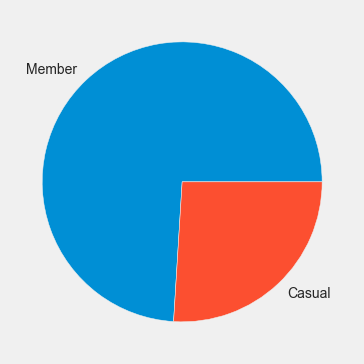

In [56]:
plt.figure(figsize=(6,6))
plt.pie(CB_Ride_Time.member_casual.value_counts(), labels = CB_Ride_Time.member_casual.unique())
plt.show()

Since only a quarter of the rides are from casual riders, majority of the rides taken are most likely from residents rather than tourists of the city.

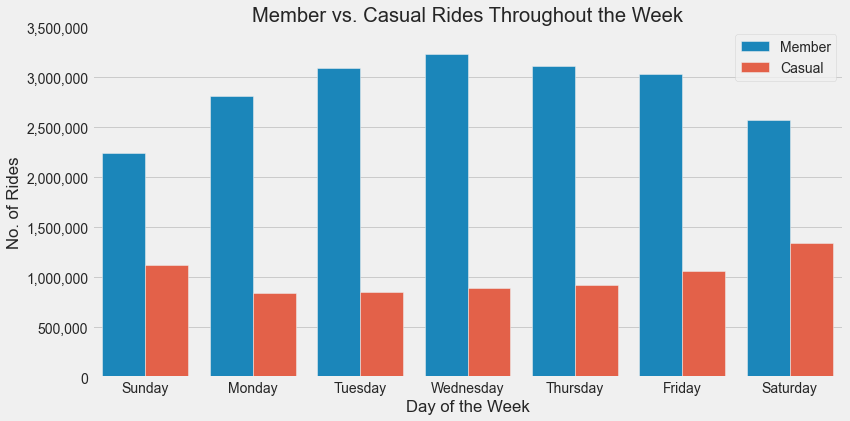

In [70]:
# Creating seaborn countplot
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'day_of_week', data = CB_Ride_Time, order = [6,0,1,2,3,4,5], hue = 'member_casual')

# Plot formatting
g.set_yticks(list(range(0,4000000,500000)))
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
g.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.legend(prop={'size': 14})
plt.title('Member vs. Casual Rides Throughout the Week')
plt.xlabel('Day of the Week')
plt.ylabel('No. of Rides')
plt.show()

Ridership is far higher among members during the weekday than the weekends, whereas the opposite is true for the casual rides. Therefore, it seems that most members may commuters and most casual riders may be tourists.

In [76]:
CB_Ride_Time.hour_of_day.loc[CB_Ride_Time.day_of_week >= 5]

2            8
3            8
4            8
8           19
10          12
            ..
28816526    16
28816534    15
28816535    21
28816537     0
28816541    13
Name: hour_of_day, Length: 7288485, dtype: int64

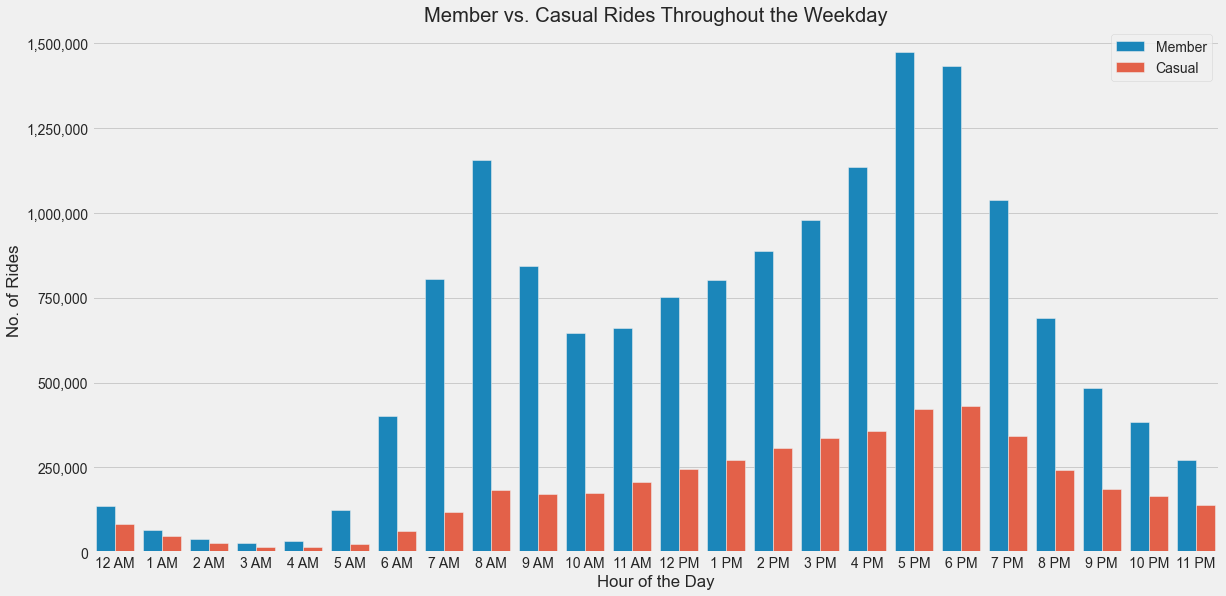

In [81]:
# Creating seaborn countplot
plt.figure(figsize=(18,9))
g = sns.countplot(x = CB_Ride_Time.hour_of_day.loc[CB_Ride_Time.day_of_week < 5], 
                  data = CB_Ride_Time, hue = 'member_casual')

# Plot formatting
g.set_yticks(list(range(0,1750000,250000)))
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
g.set_xticklabels(['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM',
                   '12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'])
plt.legend(prop={'size': 14})
plt.title('Member vs. Casual Rides Throughout the Weekday')
plt.xlabel('Hour of the Day')
plt.ylabel('No. of Rides')
plt.show()

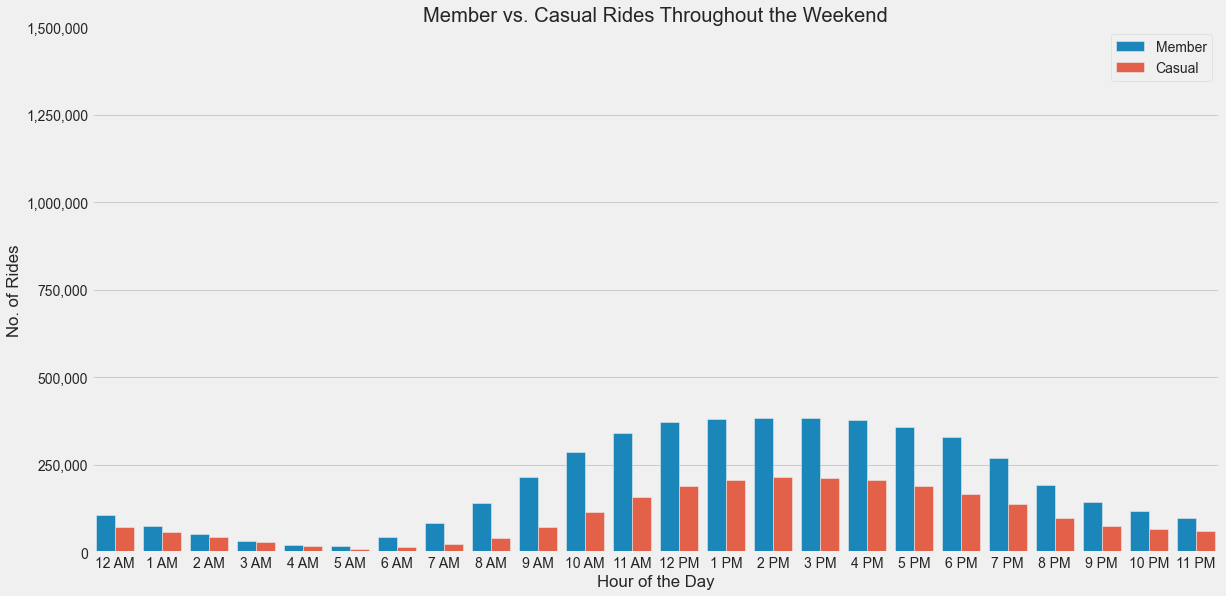

In [82]:
# Creating seaborn countplot
plt.figure(figsize=(18,9))
g = sns.countplot(x = CB_Ride_Time.hour_of_day.loc[CB_Ride_Time.day_of_week >= 5], 
                  data = CB_Ride_Time, hue = 'member_casual')

# Plot formatting
g.set_yticks(list(range(0,1750000,250000)))
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
g.set_xticklabels(['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM',
                   '12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'])
plt.legend(prop={'size': 14})
plt.title('Member vs. Casual Rides Throughout the Weekend')
plt.xlabel('Hour of the Day')
plt.ylabel('No. of Rides')
plt.show()